# Assignment 3 - Clustering town councils
## Big Data Science - Arnau Casanova & Alex Flores

### 1. Get the data - acquire the data from the csv file

In [3]:
import pandas as pd
import numpy as np

budgets_dataset = pd.read_csv("C:/Users/Arnau/Desktop/assignment-1-arnaucasanova_alexflores-master/Assignment3/Pressupostos_dels_ens_municipals_de_Catalunya.csv")
name, counts = np.unique(budgets_dataset.NOM_COMPLERT, return_counts = True)
dict(zip(name,counts))


{"Agència Local d'Energia de Barcelona": 245,
 'Agència Tributària de Sabadell': 416,
 "Agència d'Ecologia Urbana de Barcelona": 217,
 'Agència de Desenvolupament Econòmc i Turístic (ADET)': 828,
 'Agència de Desenvolupament Econòmic del Garraf': 374,
 'Agència de Desenvolupament del Berguedà': 199,
 'Agència de Desenvolupament del Ripollès': 230,
 'Agència de Promoció de Ciutat "Reus Promoció"': 205,
 "Ajuntament d'Abrera": 635,
 "Ajuntament d'Agramunt": 832,
 "Ajuntament d'Aguilar de Segarra": 347,
 "Ajuntament d'Agullana": 251,
 "Ajuntament d'Aiguafreda": 553,
 "Ajuntament d'Aiguamúrcia": 830,
 "Ajuntament d'Aiguaviva": 534,
 "Ajuntament d'Aitona": 1666,
 "Ajuntament d'Albanyà": 241,
 "Ajuntament d'Albatàrrec": 243,
 "Ajuntament d'Albesa": 832,
 "Ajuntament d'Albinyana": 833,
 "Ajuntament d'Albons": 480,
 "Ajuntament d'Alcanar": 830,
 "Ajuntament d'Alcanó": 833,
 "Ajuntament d'Alcarràs": 834,
 "Ajuntament d'Alcoletge": 833,
 "Ajuntament d'Alcover": 332,
 "Ajuntament d'Aldover": 1665

## 2. Keep data from year 2016 and town couincils (ajuntament), or in other words, discard 2017 data and data comming from entities that are not called "Ajuntament"

In [4]:
budgets_dataset = budgets_dataset.loc[budgets_dataset.ANY_EXERCICI == '01/01/2016 12:00:00 AM']
budgets_dataset = budgets_dataset.loc[budgets_dataset.NOM_COMPLERT.str.contains('Ajuntament')]
budgets_dataset.shape

name, counts = np.unique(budgets_dataset.NOM_COMPLERT, return_counts = True)
dict(zip(name,counts))

{"Ajuntament d'Abrera": 317,
 "Ajuntament d'Agramunt": 832,
 "Ajuntament d'Aguilar de Segarra": 347,
 "Ajuntament d'Agullana": 251,
 "Ajuntament d'Aiguafreda": 275,
 "Ajuntament d'Aiguamúrcia": 830,
 "Ajuntament d'Aiguaviva": 259,
 "Ajuntament d'Aitona": 833,
 "Ajuntament d'Albanyà": 241,
 "Ajuntament d'Albatàrrec": 243,
 "Ajuntament d'Albesa": 832,
 "Ajuntament d'Albinyana": 833,
 "Ajuntament d'Albons": 242,
 "Ajuntament d'Alcanar": 830,
 "Ajuntament d'Alcanó": 833,
 "Ajuntament d'Alcarràs": 834,
 "Ajuntament d'Alcoletge": 833,
 "Ajuntament d'Alcover": 332,
 "Ajuntament d'Aldover": 833,
 "Ajuntament d'Alella": 343,
 "Ajuntament d'Alfara de Carles": 249,
 "Ajuntament d'Alfarràs": 833,
 "Ajuntament d'Alforja": 833,
 "Ajuntament d'Alfés": 832,
 "Ajuntament d'Algerri": 833,
 "Ajuntament d'Alguaire": 833,
 "Ajuntament d'Alió": 255,
 "Ajuntament d'Almacelles": 833,
 "Ajuntament d'Almatret": 833,
 "Ajuntament d'Almenar": 833,
 "Ajuntament d'Almoster": 302,
 "Ajuntament d'Alp": 832,
 "Ajuntam

## 3.Analize the columns and design how will you organize your dataset

As we can see in the data all town councils use the same levels, but not the same description, neither the same screen code, but there's a relationship between levels and screen code with the digits acording to the level.

Analyzing the budget of level we can see that the sum of the budgets at level one and level two are always the same and if we look carefully we can see that the budget at level two is the entire budget and on level three there are many budgets that together compute the budged registred at level two, with this information on our mind and in order to optimize the clustering we can only keep data from budgets coming from level two.

We can also see that there are many budgets with value zero, they will be removed for a better data consistency.

Having all this tips in mind, we will try to cluster the data for all the levels and just for level two and see the differences.

To do the clustering we can observe that between the sum of incomes and expenses of each town council we can asume a linearity between them, since they are the same institution and have more or less the same, so the axis of the plot will be the incomes and the expenses of the town councils.

In [5]:
#Number of town councils 
name.shape

(882,)

In [6]:
#Number of different levels
np.unique(budgets_dataset.NIVELL)

array([1, 2, 3, 4], dtype=int64)

In [7]:
#Number of different descriptions
np.unique(budgets_dataset.DESCRIPCIO).shape


(649,)

In [8]:
#Display the different descriptions for expenses

def description_despesa(data):
    desc, count = np.unique(data.loc[(data.TIPUS_PARTIDA == 'D') & (data.TIPUS_CLASSIF == 'F'), ['DESCRIPCIO']], return_counts = True)
    return dict(zip(desc,counts))

res = description_despesa(budgets_dataset)
print("length: ", len(res))
res

length:  128


{"Abastament domiciliari d'aigua potable": 317,
 'Accés als nuclis de població': 832,
 'Actuacions de caràcter econòmic': 347,
 'Actuacions de caràcter general': 251,
 'Actuacions de protecció i promoció social': 275,
 'Administració financera i tributària': 830,
 'Administració general': 259,
 "Administració general d'educació": 833,
 "Administració general d'esports": 241,
 "Administració general d'habitatge i urbanisme": 243,
 "Administració general d'indústria i energia": 832,
 "Administració general d'infraestructures": 833,
 'Administració general de comerç, turisme i pimes': 242,
 'Administració general de cultura': 830,
 'Administració general del medi ambient': 833,
 'Administració general del transport': 834,
 'Administració gral. agricultura, ramaderia i pesca': 833,
 'Administració gral. de seguretat i protecció civil': 332,
 'Agricultura, ramaderia i pesca': 833,
 'Altre transport de viatgers': 343,
 'Altres actuacions agricultura, ramaderia i pesca': 249,
 'Altres actuaci

In [9]:
#Reduce number of levels and just keep level 2
budgets_dataset_2levels = budgets_dataset.loc[budgets_dataset.NIVELL == 2]
budgets_dataset_2levels
                              

,ANY_EXERCICI,TIPUS_PARTIDA,TIPUS_CLASSIF,CODI_PANTALLA,NIVELL,DESCRIPCIO,IMPORT,ID_ESTRUCTURA,ESTRUCTURA,CODI_ENS,NOM_COMPLERT
245,01/01/2016 12:00:00 AM,D,F,33.0,2,Cultura,394700.00,7,33,2500300000,Ajuntament d'Agramunt
671,01/01/2016 12:00:00 AM,D,F,34.0,2,Esport,7000.00,7,34,1700250006,Ajuntament d'Aiguaviva
2326,01/01/2016 12:00:00 AM,I,E,11.0,2,Impostos sobre el capital,5593799.37,7,11,800180001,Ajuntament d'Abrera
2331,01/01/2016 12:00:00 AM,I,E,13.0,2,Impost sobre activitats econòmiques,1078507.90,7,13,800180001,Ajuntament d'Abrera
2334,01/01/2016 12:00:00 AM,I,E,29.0,2,Altres impostos indirectes,300000.00,7,29,800180001,Ajuntament d'Abrera
2337,01/01/2016 12:00:00 AM,I,E,30.0,2,Taxes per la prestació de serveis públics bàsics,1491318.47,7,30,800180001,Ajuntament d'Abrera
2341,01/01/2016 12:00:00 AM,I,E,31.0,2,T. prestació serveis públics carac. social i p...,1194110.88,7,31,800180001,Ajuntament d'Abrera
2346,01/01/2016 12:00:00 AM,I,E,32.0,2,Taxes per activitats de competència local,131000.00,7,32,800180001,Ajuntament d'Abrera
2349,01/01/2016 12:00:00 AM,I,E,33.0,2,T. ús privatiu o aprofit. espai domini públ. l...,525000.00,7,33,800180001,Ajuntament d'Abrera
2352,01/01/2016 12:00:00 AM,I,E,36.0,2,Vendes,1300.00,7,36,800180001,Ajuntament d'Abrera


In [10]:
def concepte_despesa_ajuntament(data, ajuntament):
    tmp = data.loc[(data.TIPUS_PARTIDA == 'D') & (data.NOM_COMPLERT == ajuntament),['DESCRIPCIO', 'IMPORT', 'CODI_PANTALLA', 'NIVELL']]
    tmp[['CODI_PANTALLA']] = tmp[['CODI_PANTALLA']].astype(str)
    return tmp.sort_values(['CODI_PANTALLA'])
    
pd.set_option('display.max_rows', 500)
concepte_despesa_ajuntament(budgets_dataset, "Ajuntament d'Ogassa")

,DESCRIPCIO,IMPORT,CODI_PANTALLA,NIVELL
44869,Deute públic,46215.0,0.0,1
44872,Serveis públics bàsics,88700.0,1.0,1
45003,Despeses de personal,95000.0,1.0,1
44870,Deute públic,46215.0,1.0,2
44871,Deute públic,46215.0,11.0,3
44873,Seguretat i mobilitat ciutadana,0.0,13.0,2
45004,Personal laboral,72000.0,13.0,2
44874,Administració gral. de seguretat i protecció c...,0.0,130.0,3
45006,Retribucions bàsiques,72000.0,130.0,4
45005,Laboral fix,72000.0,130.0,3


In [11]:
#Remove zero budgets
budgets_dataset_2levels = budgets_dataset_2levels.loc[budgets_dataset["IMPORT"] != 0]
budgets_dataset = budgets_dataset.loc[budgets_dataset["IMPORT"] != 0]

pd.set_option('display.max_rows', 500)
concepte_despesa_ajuntament(budgets_dataset, "Ajuntament d'Ogassa")

,DESCRIPCIO,IMPORT,CODI_PANTALLA,NIVELL
44869,Deute públic,46215.0,0.0,1
44872,Serveis públics bàsics,88700.0,1.0,1
45003,Despeses de personal,95000.0,1.0,1
44870,Deute públic,46215.0,1.0,2
44871,Deute públic,46215.0,11.0,3
45004,Personal laboral,72000.0,13.0,2
45005,Laboral fix,72000.0,130.0,3
45006,Retribucions bàsiques,72000.0,130.0,4
44880,Habitatge i urbanisme,77700.0,15.0,2
44882,"Urbanisme: Planejament,gest exec. i disc. urb.",77700.0,151.0,3


## Clustering the data 

To cluster the data we need a new dataset with all the town council with their sum of budgets of incomes and expenses, to do this we will define a function that will do the work and will generate a new array containing the useful data to implement the k-means clustering.

In [12]:
budgets_dataset.shape

(178168, 11)

In [13]:
budgets_dataset_2levels.shape

(41991, 11)

In [19]:
def generateArray(budgets):
    ids = np.unique(budgets.CODI_ENS)
    resultat = np.empty((ids.shape[0], 3))
    i = 0
    for identifier in ids:
        despeses =  np.sum(budgets.loc[(budgets.TIPUS_PARTIDA == 'D') & (budgets.CODI_ENS == identifier), ["IMPORT"]].IMPORT)
        ingressos = np.sum(budgets.loc[(budgets.TIPUS_PARTIDA == 'I') & (budgets.CODI_ENS == identifier), ["IMPORT"]].IMPORT)
        resultat[i] = [identifier, ingressos, despeses]
        i+=1
    return resultat

In [20]:
new_budgets_dataset = generateArray(budgets_dataset)
new_budgets_dataset_2levels = generateArray(budgets_dataset_2levels)

In [21]:
new_budgets_dataset

array([[8.00180001e+08, 4.52862159e+07, 9.52842650e+07],
       [8.00230008e+08, 1.05162000e+07, 2.12483121e+07],
       [8.00390004e+08, 4.19815289e+07, 8.85857316e+07],
       ...,
       [4.39057000e+09, 1.27906000e+08, 2.70731853e+08],
       [4.39060000e+09, 1.62978725e+07, 3.23994095e+07],
       [4.39076001e+09, 3.44369000e+07, 7.03371000e+07]])

In [22]:
new_budgets_dataset_2levels

array([[8.00180001e+08, 1.42794434e+07, 2.85588868e+07],
       [8.00230008e+08, 3.40620000e+06, 6.81240000e+06],
       [8.00390004e+08, 1.32579572e+07, 2.65159145e+07],
       ...,
       [4.39057000e+09, 3.98770000e+07, 7.97540000e+07],
       [4.39060000e+09, 5.09635262e+06, 1.01927052e+07],
       [4.39076001e+09, 1.10290000e+07, 2.20580000e+07]])

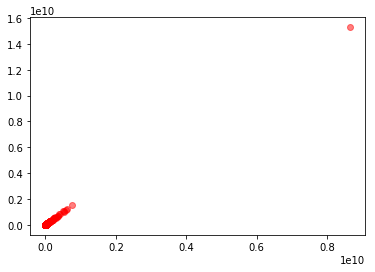

In [23]:
#Plot representing the generated dataset
from sklearn import cluster
import matplotlib.pyplot as plot

plot.scatter(new_budgets_dataset[:, 1], new_budgets_dataset[:, 2], c='red', alpha=0.5)

We can see a lost point that is very far from the other town councils, we will try to discard that town council in our clustering in order to obtain a better perspective of the plot.

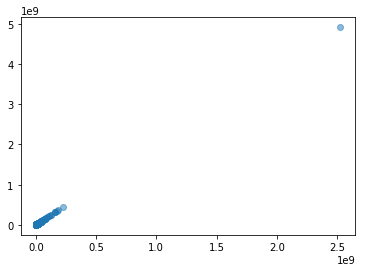

In [24]:
plot.scatter(new_budgets_dataset_2levels[:, 1], new_budgets_dataset_2levels[:, 2], alpha = 0.5)

Aparently, we cannot see a clear difference between the two plots, just that the value of the axis is reduced at level two, this is obvius since the first plot takes all the levels, so the sum of all budgets of the town council.

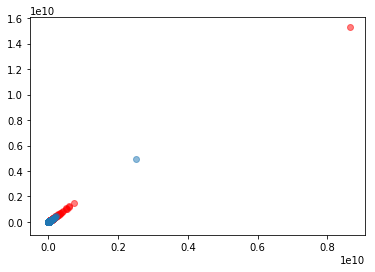

In [25]:
plot.scatter(new_budgets_dataset[:, 1], new_budgets_dataset[:, 2], c='red', alpha=0.5)
plot.scatter(new_budgets_dataset_2levels[:, 1], new_budgets_dataset_2levels[:, 2], alpha = 0.5)

As we can see in this mixed plot is the linearlity between the two datasets, where the difference is the reduction on the values on the dataset focused only on level two budgets. We can also see the two points that are very far from the rest clearly.

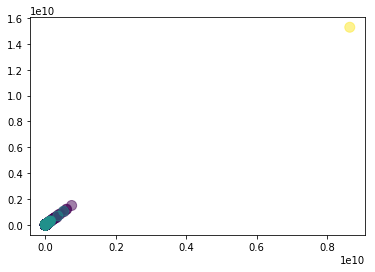

In [27]:
#Implementing k-means
n = 3
cl = cluster.KMeans(n_clusters=n)
cl.fit(new_budgets_dataset)
colors = cl.predict(new_budgets_dataset)
plot.scatter(new_budgets_dataset[:, 1], new_budgets_dataset[:, 2], c=colors, s=100, alpha = 0.5)

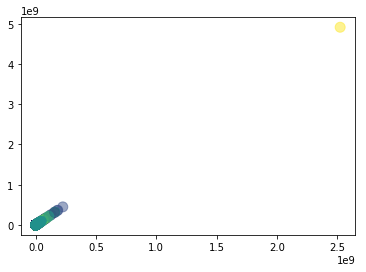

In [28]:
n = 5
cl = cluster.KMeans(n_clusters=n)
cl.fit(new_budgets_dataset_2levels)
colors = cl.predict(new_budgets_dataset_2levels)
plot.scatter(new_budgets_dataset_2levels[:, 1], new_budgets_dataset_2levels[:, 2], c=colors, s=100, alpha = 0.5)

## Conclusion

We can see that aparently there's no big difference in clustering with only level 2 or all levels, we couldnt solve the problem with the lost point, but if we remove that town council from the dataset we could see the clustering more clearly.

The conclusion is that many of the town councils of Catalonia are agrupated in an interval and the lower values on this interval may represent the smaller towns of Catalonia and the greater values represent big towns and citys, but there's not a significative difference between them, there are not outliers, except one that may be the bigger or richer city on Catalonia and I bet that city is Barcelona.